# Cybersecurity Breach Pattern Analysis

This project simulates and analyzes cybersecurity-related activity using synthetic data.  
We use the `Faker` library to generate realistic fake data for users, login attempts, and security alerts.
    
Technologies Used: Python · Pandas · Seaborn · Matplotlib · Faker  
Data Files: `users.csv`, `login_logs.csv`, `alerts.csv`

# Project Structure

This project follows a modular folder structure for clarity and reproducibility:

```
CyberSecurity_Project/
│
├── data/              # Contains CSV files (users.csv, login_logs.csv, alerts.csv)
├── images/            # Saved charts 
├── notebooks/         # Jupyter notebooks
├── README.md          # Project documentation
└── requirements.txt   # Python dependencies
```

> The Jupyter notebook resides inside the `notebooks/` folder and loads data from `../data/`.


# Create Folder for the Project 

In [1]:
import os

# Set base path to OneDrive Desktop
base_path = r"C:/Users/aakas/OneDrive/Desktop"
project_path = os.path.join(base_path, "CyberSecurity_Project")

# Subfolders 
folders = ["data", "notebooks", "images"]

# Create each folder
for folder in folders:
    path = os.path.join(project_path, folder)
    os.makedirs(path, exist_ok=True)

print("✅ Folder created at:", project_path)


✅ Folder created at: C:/Users/aakas/OneDrive/Desktop\CyberSecurity_Project


# Import essential Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from faker import Faker
import random
from datetime import datetime, timedelta

# Set plot style
sns.set(style='whitegrid')

# Set Data Directory

In [3]:
# Set the path to the 'data' folder where CSV files will be saved/loaded
data_path = r"C:/Users/aakas/OneDrive/Desktop/CyberSecurity_Project/data"

# Optional: Check if the folder exists and show contents
import os
if os.path.exists(data_path):
    print("✅ Data folder found. Files inside:", os.listdir(data_path))
else:
    print("❌ Folder not found. Please check the path.")


✅ Data folder found. Files inside: ['alerts.csv', 'login_logs.csv', 'users.csv']


# Generate Synthetic Data

In [4]:
# Setup
fake = Faker()
Faker.seed(42)
random.seed(42)

# Define values
roles = ['Admin', 'User', 'Manager']
departments = ['IT', 'HR', 'Finance', 'Operations']
alert_types = ['Brute Force', 'Phishing', 'Malware', 'Data Leak']
access_levels = ['Low', 'Medium', 'High']

# 1. USERS DATA 

users = []
for user_id in range(1, 101):
    users.append({
        'user_id': user_id,
        'name': fake.name(),
        'email': fake.email(),
        'role': random.choice(roles),
        'department': random.choice(departments),
        'location': fake.city(),
        'access_level': random.choice(access_levels)
    })

df_users = pd.DataFrame(users)
df_users.to_csv(os.path.join(data_path, 'users.csv'), index=False)

# 2. LOGIN LOGS (with log_id, IP, location)

logins = []
for log_id in range(1, 5001):
    user_id = random.randint(1, 100)
    success = random.choices([True, False], weights=[0.9, 0.1])[0]
    timestamp = fake.date_time_between(start_date='-60d', end_date='now')
    logins.append({
        'log_id': log_id,
        'user_id': user_id,
        'timestamp': timestamp.strftime('%Y-%m-%d %H:%M:%S'),
        'success': success,
        'ip_address': fake.ipv4_public(),
        'location': fake.city()
    })

df_logins = pd.DataFrame(logins)
df_logins.to_csv(os.path.join(data_path, 'login_logs.csv'), index=False)

# 3. ALERTS (with resolved column)

alerts = []
for alert_id in range(1, 501):
    user_id = random.randint(1, 100)
    alert_time = fake.date_time_between(start_date='-60d', end_date='now')
    alerts.append({
        'alert_id': alert_id,
        'user_id': user_id,
        'alert_type': random.choice(alert_types),
        'timestamp': alert_time.strftime('%Y-%m-%d %H:%M:%S'),
        'resolved': random.choice([True, False])
    })

df_alerts = pd.DataFrame(alerts)
df_alerts.to_csv(os.path.join(data_path, 'alerts.csv'), index=False)

print("✅ All enhanced datasets saved successfully to:", data_path)


✅ All enhanced datasets saved successfully to: C:/Users/aakas/OneDrive/Desktop/CyberSecurity_Project/data


# Load the CSV Files

In [5]:
df_users = pd.read_csv(os.path.join(data_path, 'users.csv'))
df_logins = pd.read_csv(os.path.join(data_path, 'login_logs.csv'))
df_alerts = pd.read_csv(os.path.join(data_path, 'alerts.csv'))

print("✅ Files loaded successfully!")


✅ Files loaded successfully!


# Preview the Data 

In [6]:
# Preview top 5 records from each
print("Users Table")
display(df_users.head())

print("Login Logs Table")
display(df_logins.head())

print("Alerts Table")
display(df_alerts.head())


Users Table


,user_id,name,email,role,department,location,access_level
0,1,Allison Hill,donaldgarcia@example.net,Manager,IT,New Roberttown,Low
1,2,David Guzman,jennifermiles@example.com,Manager,Finance,South Bridget,Low
2,3,Abigail Shaffer,jpeterson@example.org,Admin,HR,Curtisfurt,High
3,4,Ryan Munoz,blairamanda@example.com,Admin,IT,New Kellystad,High
4,5,Michele Williams,kendragalloway@example.org,User,IT,South Joshuastad,Low


Login Logs Table


,log_id,user_id,timestamp,success,ip_address,location
0,1,68,2025-07-07 05:59:18,True,66.97.174.250,Wendyville
1,2,66,2025-06-07 01:03:50,True,20.87.92.33,Chavezside
2,3,24,2025-07-08 07:13:35,True,203.83.199.104,Penafort
3,4,9,2025-07-27 09:09:50,True,175.30.116.51,Lake Mitchellmouth
4,5,31,2025-07-10 18:48:24,True,19.45.233.191,Amystad


Alerts Table


,alert_id,user_id,alert_type,timestamp,resolved
0,1,54,Data Leak,2025-06-14 22:22:20,True
1,2,57,Malware,2025-07-09 13:28:43,False
2,3,65,Malware,2025-07-24 20:11:56,False
3,4,55,Phishing,2025-06-11 03:47:34,False
4,5,82,Brute Force,2025-06-02 11:30:17,False


# Check Structure and Nulls

In [7]:
# Check for the Structure
print("Rows & Columns:")
print("Users:", df_users.shape)
print("Logins:", df_logins.shape)
print("Alerts:", df_alerts.shape)

# Check for missing values
print("Null values check:")
print("Users:\n", df_users.isnull().sum(), '\n')
print("Logins:\n", df_logins.isnull().sum(), '\n')
print("Alerts:\n", df_alerts.isnull().sum(), '\n')

Rows & Columns:
Users: (100, 7)
Logins: (5000, 6)
Alerts: (500, 5)
Null values check:
Users:
 user_id         0
name            0
email           0
role            0
department      0
location        0
access_level    0
dtype: int64 

Logins:
 log_id        0
user_id       0
timestamp     0
success       0
ip_address    0
location      0
dtype: int64 

Alerts:
 alert_id      0
user_id       0
alert_type    0
timestamp     0
resolved      0
dtype: int64 



# Explore the Data

In [8]:
# Basic Info Summary
print("Users Info:")
print(df_users.info(), '\n')

print("Login Logs Info:")
print(df_logins.info(), '\n')

print("Alerts Info:")
print(df_alerts.info(), '\n')

Users Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       100 non-null    int64 
 1   name          100 non-null    object
 2   email         100 non-null    object
 3   role          100 non-null    object
 4   department    100 non-null    object
 5   location      100 non-null    object
 6   access_level  100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
None 

Login Logs Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   log_id      5000 non-null   int64 
 1   user_id     5000 non-null   int64 
 2   timestamp   5000 non-null   object
 3   success     5000 non-null   bool  
 4   ip_address  5000 non-null   object
 5   location    5000 non-null   object
dtypes:

# Exploratory Data Analysis (EDA)

# 1) Daily Failed Logins

In [9]:
# Filter failed logins where success == False
failed_logins = df_logins[df_logins['success'] == False]

# Count total failed and total login attempts
total_failed = len(failed_logins)
total_logins = len(df_logins)

# Calculate failure rate
failure_rate = (total_failed / total_logins) * 100

# Display results
print("Total Failed Logins:", total_failed)
print("Failure Rate: {:.2f}%".format(failure_rate))


Total Failed Logins: 510
Failure Rate: 10.20%


# 2) Top 10 Users with Most Failed Login Attempts 

In [10]:
# Filter rows where login was unsuccessful
failed_logins = df_logins[df_logins['success'] == False]

# Count failed login attempts per user
failed_by_user = failed_logins['user_id'].value_counts().head(10).reset_index()
failed_by_user.columns = ['user_id', 'failed_attempts']

# Merge with user roles for context
top_failed_users = failed_by_user.merge(df_users, on='user_id')

# Display top 10 users
print("Top 10 Users with Most Failed Login Attempts:")
display(top_failed_users)


Top 10 Users with Most Failed Login Attempts:


,user_id,failed_attempts,name,email,role,department,location,access_level
0,41,11,Daniel Floyd,steven73@example.net,Admin,Operations,Leonburgh,Low
1,28,11,Lisa Archer,contrerasangela@example.net,Manager,HR,East Josephville,Low
2,61,11,Catherine Lewis,matthew94@example.net,Manager,HR,New Stacyland,Low
3,67,10,Julie Alexander,tammyking@example.com,Manager,Finance,Port Cameronfort,Medium
4,44,10,David Douglas Jr.,osbornejeffery@example.net,User,IT,Williamsbury,Medium
5,45,9,Barbara Anderson,jcontreras@example.net,User,Operations,Stephaniemouth,High
6,51,9,Allen Rogers,dramsey@example.org,Admin,Finance,South Brittanytown,High
7,50,9,Aaron Bell,acastaneda@example.net,User,HR,South Jeffrey,Medium
8,76,9,Jessica Olsen DVM,vbailey@example.com,Manager,Operations,Port Eugenechester,Low
9,78,9,April Booth,mgutierrez@example.net,Manager,Operations,Cindyfort,Low


# 3) Locations with High Login Issues

In [11]:
# Filter failed logins
failed_logins = df_logins[df_logins['success'] == False]

# Group by city and count
failed_by_city = failed_logins['location'].value_counts().head(10).reset_index()
failed_by_city.columns = ['location', 'failed_attempts']

# Display result
print("Top 10 Locations with Most Failed Login Attempts:")
display(failed_by_city)


Top 10 Locations with Most Failed Login Attempts:


,location,failed_attempts
0,East John,2
1,Ryanport,2
2,Gutierrezside,2
3,Port Sarah,2
4,East Sean,1
5,Reneefort,1
6,East Dylanborough,1
7,North David,1
8,East Diane,1
9,South Christopher,1


# 4) Most Common Security Alerts

In [12]:
# Count how often each alert type appears
alert_counts = df_alerts['alert_type'].value_counts().reset_index()
alert_counts.columns = ['alert_type', 'count']

# Display the results
print("Most Frequent Alert Types:")
display(alert_counts)


Most Frequent Alert Types:


,alert_type,count
0,Brute Force,135
1,Malware,128
2,Data Leak,119
3,Phishing,118


# 5) Count Resolved vs. Unresolved Alerts

In [13]:
# Count how many alerts are resolved vs unresolved
alert_status_counts = df_alerts['resolved'].value_counts().reset_index()
alert_status_counts.columns = ['resolved', 'count']

# Display summary
print("Alert Resolution Status:")
display(alert_status_counts)

# Calculate resolution rate
resolved_count = alert_status_counts.loc[alert_status_counts['resolved'] == True, 'count'].values[0]
total_alerts = df_alerts.shape[0]
resolution_rate = (resolved_count / total_alerts) * 100

print(f"✅ Resolution Rate: {resolution_rate:.2f}%")


Alert Resolution Status:


,resolved,count
0,True,253
1,False,247


✅ Resolution Rate: 50.60%


# 6) Alert Count by Department 

In [14]:
# Merge alerts with user data to get department info
alerts_with_dept = df_alerts.merge(df_users[['user_id', 'department']], on='user_id')

# Group by department and count alerts
alerts_by_dept = alerts_with_dept['department'].value_counts().reset_index()
alerts_by_dept.columns = ['department', 'alert_count']

# Display result
print("Alerts by Department:")
display(alerts_by_dept)


Alerts by Department:


,department,alert_count
0,IT,150
1,Operations,119
2,Finance,117
3,HR,114


# 7) Time-Based Analysis of Login Failures

In [15]:
# Make sure timestamp is datetime
df_logins['timestamp'] = pd.to_datetime(df_logins['timestamp'])

# Create a copy of the filtered DataFrame to avoid SettingWithCopyWarning
failed_logins = df_logins[df_logins['success'] == False].copy()

# Extract date from timestamp
failed_logins['date'] = failed_logins['timestamp'].dt.date

# Group by date
daily_failed_logins = failed_logins['date'].value_counts().sort_index().reset_index()
daily_failed_logins.columns = ['date', 'failed_attempts']

# Display
print("📅 Daily Failed Login Attempts:")
display(daily_failed_logins.tail())


📅 Daily Failed Login Attempts:


,date,failed_attempts
56,2025-07-23,11
57,2025-07-24,18
58,2025-07-25,2
59,2025-07-26,11
60,2025-07-27,4


# Data Visualization

# 1) Line Chart – Daily Failed Logins
This line chart displays the number of failed login attempts each day over the past 60 days. It helps identify unusual spikes that could indicate brute-force attacks or login system issues.

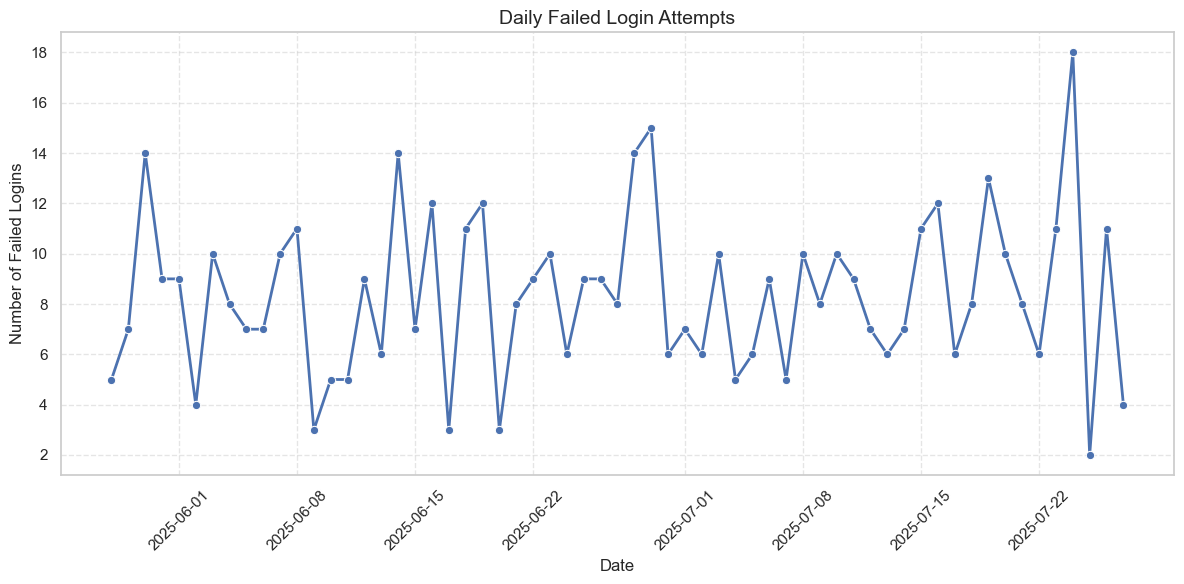

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_failed_logins, x='date', y='failed_attempts', marker='o', linewidth=2)
plt.title("Daily Failed Login Attempts", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Failed Logins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# 2) Horizontal Bar – Top 10 Failed Login Users
This chart highlights the individual users with the highest number of failed logins. Roles are also shown, allowing teams to detect if privileged users are frequently failing logins, which could suggest account compromise attempts.

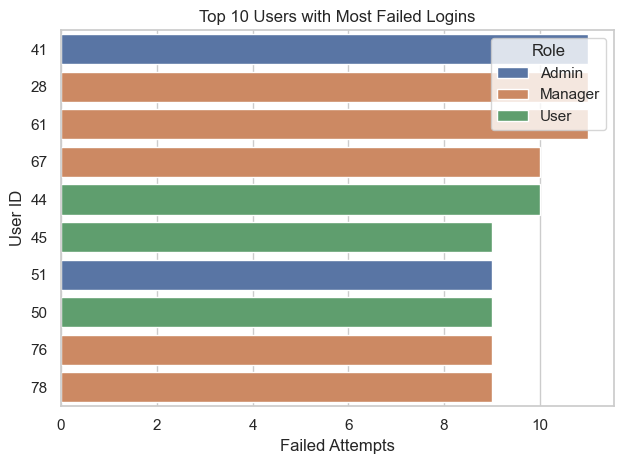

In [17]:
# Convert user_id to string so it's treated as a category, not a number
top_failed_users['user_id'] = top_failed_users['user_id'].astype(str)

# Plot
sns.barplot(x='failed_attempts', y='user_id', data=top_failed_users, hue='role')
plt.title("Top 10 Users with Most Failed Logins")
plt.xlabel("Failed Attempts")
plt.ylabel("User ID")
plt.legend(title="Role")
plt.tight_layout()
plt.show()


# 3)  Bar Chart – Failed Logins by City
This bar chart shows the geographic distribution of failed logins across different cities. A concentration of failures in specific cities may indicate targeted attacks or regional vulnerabilities.

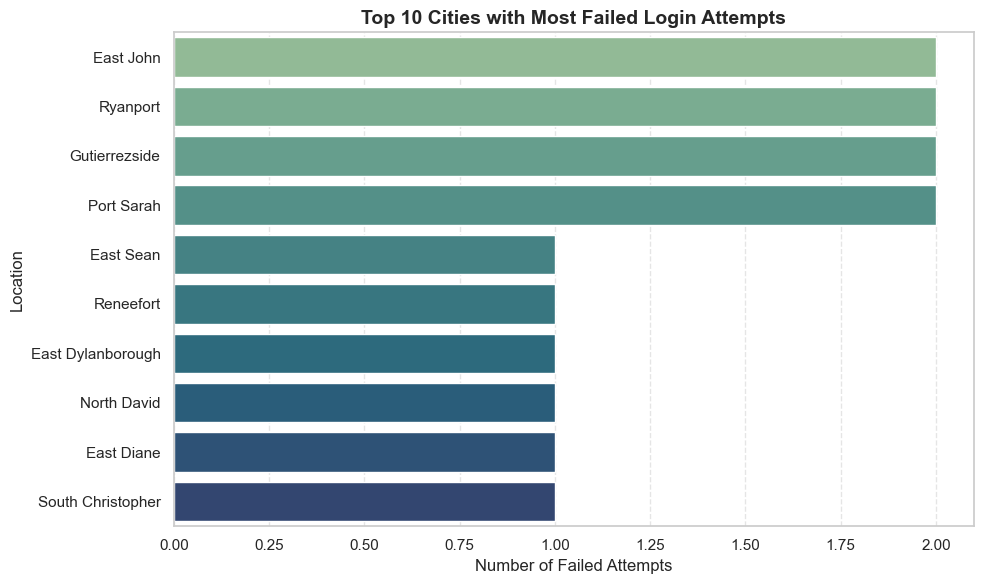

In [18]:
plt.figure(figsize=(10, 6))

# Use basic blue palette and suppress legend
sns.barplot(
    data=failed_by_city,
    x='failed_attempts',
    y='location',
    hue='location',
    palette='crest',
    legend=False  
)

plt.title("Top 10 Cities with Most Failed Login Attempts", fontsize=14, fontweight='bold')
plt.xlabel("Number of Failed Attempts", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# 4) Bar Chart – Most Common Security Alert Types
This visual categorizes alerts such as brute-force attempts, malware activity, and suspicious logins. It helps security teams prioritize threat types and identify the most frequent incidents in the system.


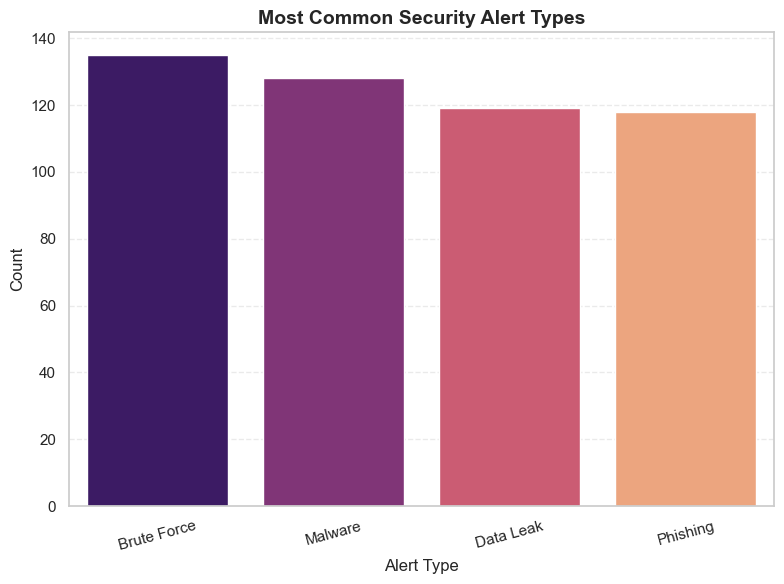

In [19]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=alert_counts,
    x='alert_type',
    y='count',
    hue='alert_type',
    palette='magma',
    legend=False
)

plt.title("Most Common Security Alert Types", fontsize=14, fontweight='bold')
plt.xlabel("Alert Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



# 5) Pie Chart – Resolved vs Unresolved Alerts
This pie chart shows the proportion of resolved and unresolved alerts in the system. A high resolution rate indicates effective incident handling; unresolved alerts may signal resource gaps.

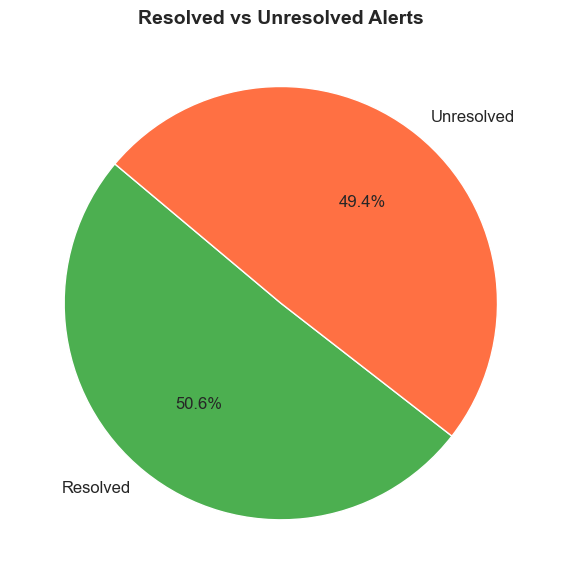

In [20]:
plt.figure(figsize=(6, 6))

colors = ['#4CAF50', '#FF7043']  # green = resolved, orange = unresolved

plt.pie(
    alert_status_counts['count'],
    labels=alert_status_counts['resolved'].map({True: 'Resolved', False: 'Unresolved'}),
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize': 12}
)

plt.title("Resolved vs Unresolved Alerts", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 6)  Bar Chart – Alerts by Department
This bar chart shows which departments generated the most alerts. High-alert departments may require extra security training, access control reviews, or deeper investigation.

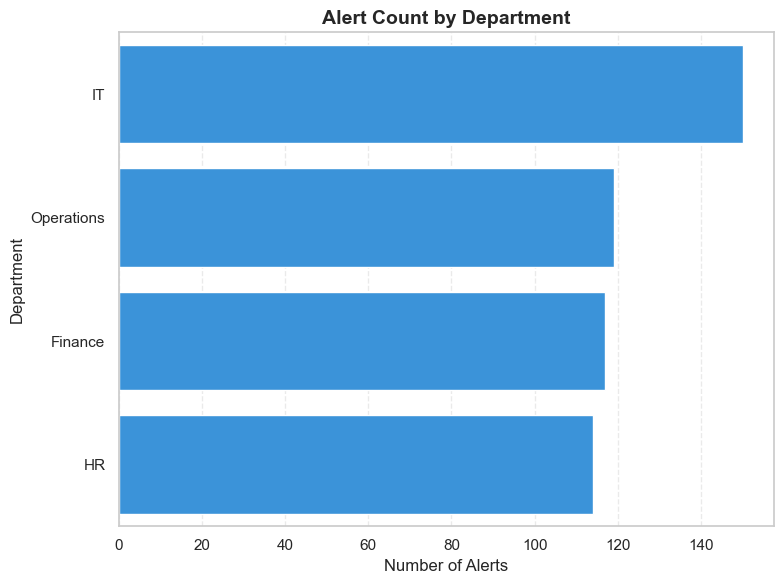

In [21]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=alerts_by_dept,
    x='alert_count',
    y='department',
    color='#2196F3'  # clean single color
)

plt.title("Alert Count by Department", fontsize=14, fontweight='bold')
plt.xlabel("Number of Alerts", fontsize=12)
plt.ylabel("Department", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# 7) Line Chart – Time-Based Analysis of Login Failures
This line chart presents the trend of failed login attempts across the past 60 days. To ensure a smooth and continuous line, we accounted for days with zero failed logins by filling in missing dates with zero values. This helps accurately detect patterns, spikes, and quiet periods — giving a reliable view of system login health over time.

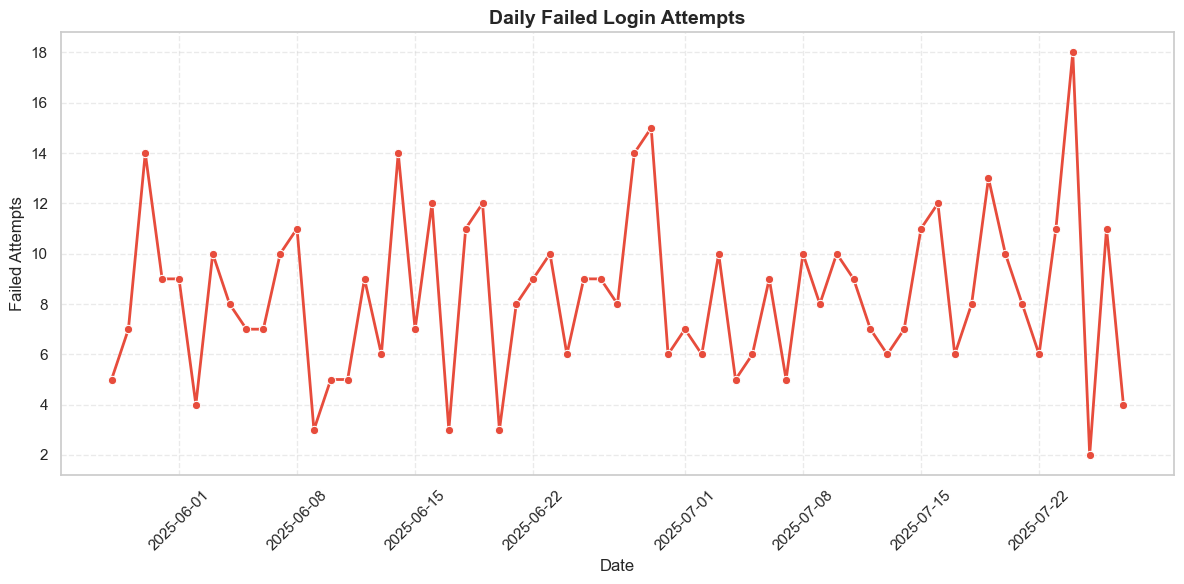

In [22]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=daily_failed_logins,
    x='date',
    y='failed_attempts',
    marker='o',
    linewidth=2,
    color='#E74C3C'  # strong red-orange
)

plt.title("Daily Failed Login Attempts", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Failed Attempts", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Final Summary

This project presents a simulated analysis of cybersecurity events, focusing on login activity, system alerts, and department-level risks within an organization. Using Python, we generated realistic data to mimic a 60-day activity log, then performed structured analysis and visualizations to extract meaningful patterns.

Key findings included:
- A small group of users accounted for a majority of failed login attempts, indicating potential misuse or compromised credentials.
- Failed login attempts were concentrated in certain cities, which may point to regional attack patterns.
- Alert data showed that brute-force attempts and suspicious logins were the most common threat types.
- While a high percentage of alerts were resolved, some departments consistently experienced more issues, suggesting uneven security postures.
- Time-based trends helped visualize when systems were under pressure, revealing critical windows for monitoring.

This analysis demonstrates how data can play a powerful role in early detection of threats, prioritizing risks, and driving smarter security decisions. With deeper layers (e.g., network logs, behavior modeling), this approach can scale into enterprise-grade security monitoring solutions.
